In [1]:
import swiftest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
swiftersim = swiftest.Simulation(param_file=inparfile, codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 3.652e+03
Creating Dataset
Successfully converted 333 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
inparfile = 'param.swiftest.in'
swiftestsim = swiftest.Simulation(param_file=inparfile)
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in
Reading in time 3.652e+03
Creating Dataset
Successfully converted 333 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [6]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['px']**2 + swiftdiff['py']**2 + swiftdiff['pz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vx']**2 + swiftdiff['vy']**2 + swiftdiff['vz']**2)

In [7]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 10]
tpidx = swiftdiff.id.values[swiftdiff.id.values > 10]

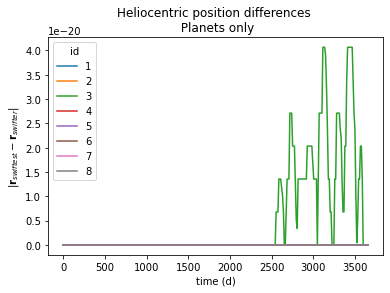

In [8]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("symba_swifter_comparison-8pl-16tp-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

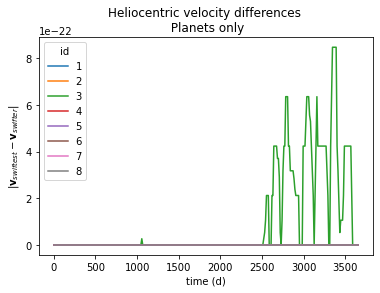

In [9]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("symba_swifter_comparison-8pl-16tp-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


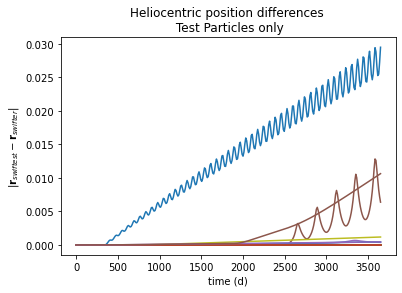

In [10]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("symba_swifter_comparison-8pl-16tp-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


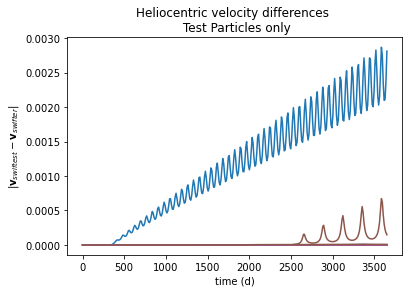

In [11]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("symba_swifter_comparison-8pl-16tp-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)

In [12]:
swiftdiff['rmag'].sel(id=101)

<xarray.DataArray 'rmag' (time (d): 333)>
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.31299453e-05, 1.10256458e-04, 2.75094986e-04, 4.69124720e-04,
       6.37819916e-04, 7.27318191e-04, 7.18330839e-04, 7.05788012e-04,
       7.97070205e-04, 9.82447303e-04, 1.20167017e-03, 1.38568730e-03,
       1.45290098e-03, 1.40294485e-03, 1.38935207e-03, 1.50610105e-03,
       1.72636743e-03, 1.97891692e-03, 2.15521444e-03, 2.14661851e-03,
       2.04956741e-03, 2.06272718e-03, 2.23569416e-03, 2.51534860e-03,
       2.79363959e-03, 2.89613835e-03, 2.77700315e-03, 2.67482627e-03,
       2.75622597e-03, 3.01487525e-03, 3.35945752e-03, 3.60350706e-03,
       3.55128396e-03, 3.35402969e-03, 3.30174593e-03, 3.47779871e-03,
       3.82651300e-03, 4.18801472e-03, 4.28414157e-03, 4.06893950e-03,
       3.88578189e-03, 3.94894190e-03, 4.25789004e-03, 4.69085774e-03,
       4.96754228e-03, 4.83413401e-03, 4.54497227e-03, 4.46337913e-03,
...
       2.27552238e-02, 2.14336750e-02, 1.99536744e-02, 1.95375781e-02,
       2.04244088e-02, 2.21837929e-02, 2.34223481e-02, 2.27021040e-02,
       2.10235992e-02, 2.00677152e-02, 2.04357446e-02, 2.19768363e-02,
       2.37069871e-02, 2.38363613e-02, 2.22656122e-02, 2.08398594e-02,
       2.06361170e-02, 2.17797283e-02, 2.36717320e-02, 2.46713026e-02,
       2.35870574e-02, 2.18518073e-02, 2.10654197e-02, 2.16919542e-02,
       2.34510849e-02, 2.51073368e-02, 2.48399705e-02, 2.30713464e-02,
       2.17469301e-02, 2.17840155e-02, 2.31897238e-02, 2.51636545e-02,
       2.58443413e-02, 2.44211632e-02, 2.26850711e-02, 2.21027725e-02,
       2.30035080e-02, 2.49559537e-02, 2.64520803e-02, 2.57657096e-02,
       2.38584911e-02, 2.26793113e-02, 2.29810558e-02, 2.46443582e-02,
       2.66327359e-02, 2.69250458e-02, 2.52077666e-02, 2.35270452e-02,
       2.31818105e-02, 2.43687433e-02, 2.64772190e-02, 2.77223877e-02,
       2.66190162e-02, 2.46370466e-02, 2.36453830e-02, 2.42344674e-02,
       2.61438944e-02, 2.80669485e-02, 2.79190320e-02, 2.59650741e-02,
       2.43925884e-02, 2.43144014e-02, 2.57928520e-02, 2.80043257e-02,
       2.89095241e-02, 2.74149807e-02, 2.54220912e-02, 2.46556068e-02,
       2.55482541e-02, 2.76783912e-02, 2.94435958e-02, 2.88268702e-02,
       2.67028523e-02, 2.52872339e-02, 2.55012432e-02, 2.72669007e-02,
       2.95109669e-02])
Coordinates:
    id        int64 101
  * time (d)  (time (d)) float64 0.0 11.0 22.0 ... 3.63e+03 3.641e+03 3.652e+03